In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

In [30]:
df=pd.read_csv('iris.csv')

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:

df.shape

(150, 5)

In [8]:
#Class Distribution
print(df.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


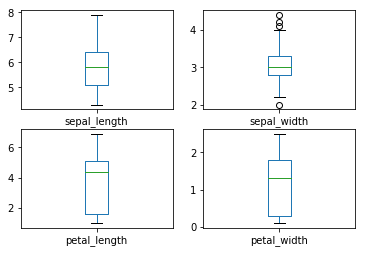

In [9]:
#data visulation
#1)Univariate Plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

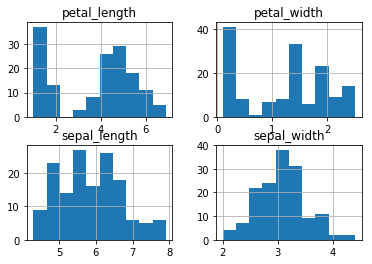

In [10]:
# histograms
df.hist()
plt.show()

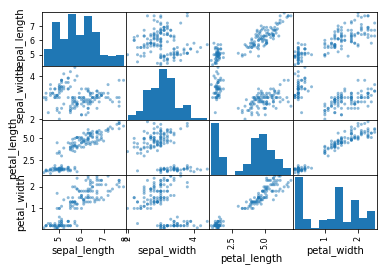

In [11]:
#Multivariate Plots
# scatter plot matrix
scatter_matrix(df)
plt.show()

C:\Users\Ali Haider\anaconda33\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


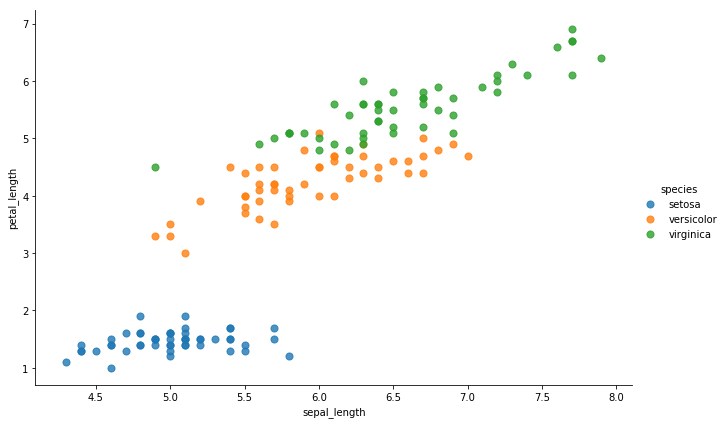

In [12]:
#The data distribution with these two components now look like:
vis = sns.lmplot(data = df[["sepal_length","petal_length","species"]], x = "sepal_length", y = "petal_length",fit_reg=False, hue = "species",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
vis.savefig("lda.png")

C:\Users\Ali Haider\anaconda33\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


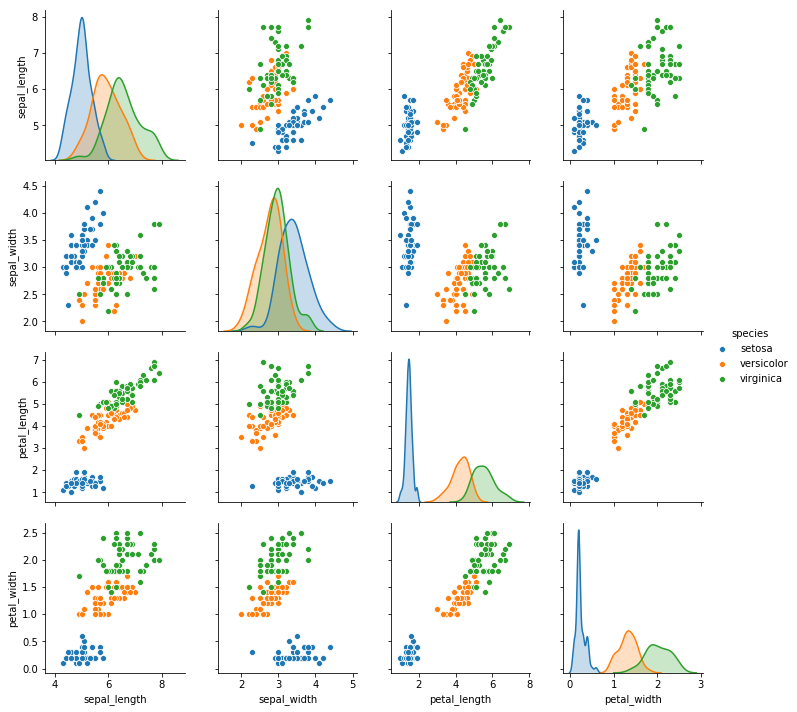

In [13]:
sns.pairplot(df, hue="species")

In [32]:
# Evaluate Some Algorithms
# Create a Validation Dataset
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [35]:
Y_train

array(['virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'setos

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()

In [42]:
Y_train=label_encoder_y.fit_transform(Y_train)

In [46]:
Y_validation=label_encoder_y.fit_transform(Y_validation)

In [48]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [84]:
#models
#Logistic Regression (LR)
#Linear Discriminant Analysis (LDA)
#
#GradientBoostingClassifier(GBC)
#LinearDiscriminantAnalysis(LDA)
#RandomForestClassifier(RFC)
#K-Nearest Neighbors (KNN).
#Classification and Regression Trees (CART).
#Gaussian Naive Bayes (NB).
#Support Vector Machines (SVM).

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('GradientBoostingClassifier',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)))
models.append(('Decision Tree', tree.DecisionTreeClassifier(criterion='gini')))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
RandomForestClassifier: 0.966667 (0.040825)
GradientBoostingClassifier: 0.966667 (0.040825)
Decision Tree: 0.966667 (0.040825)
SVM: 0.991667 (0.025000)


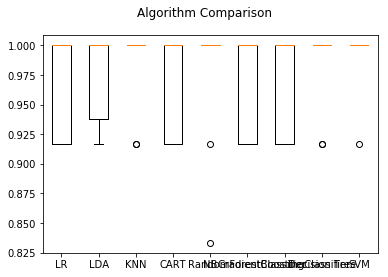

In [17]:
#Select Best Model
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [18]:
#Make Predictions
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         7
 versicolor       0.85      0.92      0.88        12
  virginica       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30



In [62]:
#Make Predictions
# Make predictions on validation dataset
adr = AdaBoostRegressor()

In [78]:
adr.fit(X_train, Y_train)
adr.score(X_train, Y_train)

0.999603013029316

In [85]:
adr.score(X_validation,Y_validation)

0.7812977099236641